In [6]:
!pip install torch torchvision
!pip install ultralytics

# Import necessary libraries
from roboflow import Roboflow
import torch
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 29.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.4/112.6 GB disk)


In [11]:
from ultralytics import YOLO
from IPython.display import display, Image

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="piRhq2j2GaSLtIXlmPsi")
project = rf.workspace("pde3821").project("annotating-300-cards")
version = project.version(3)
dataset = version.download("yolov9")



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Annotating-~300-Cards--3 in yolov9:: 100%|██████████| 568/568 [00:03<00:00, 157.84it/s]


In [12]:
!yolo task=detect mode=train model=yolov9s.pt data="/content/Annotating-~300-Cards--3/data.yaml" epochs=40 imgsz=800 plots=True


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=/content/Annotating-~300-Cards--3/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

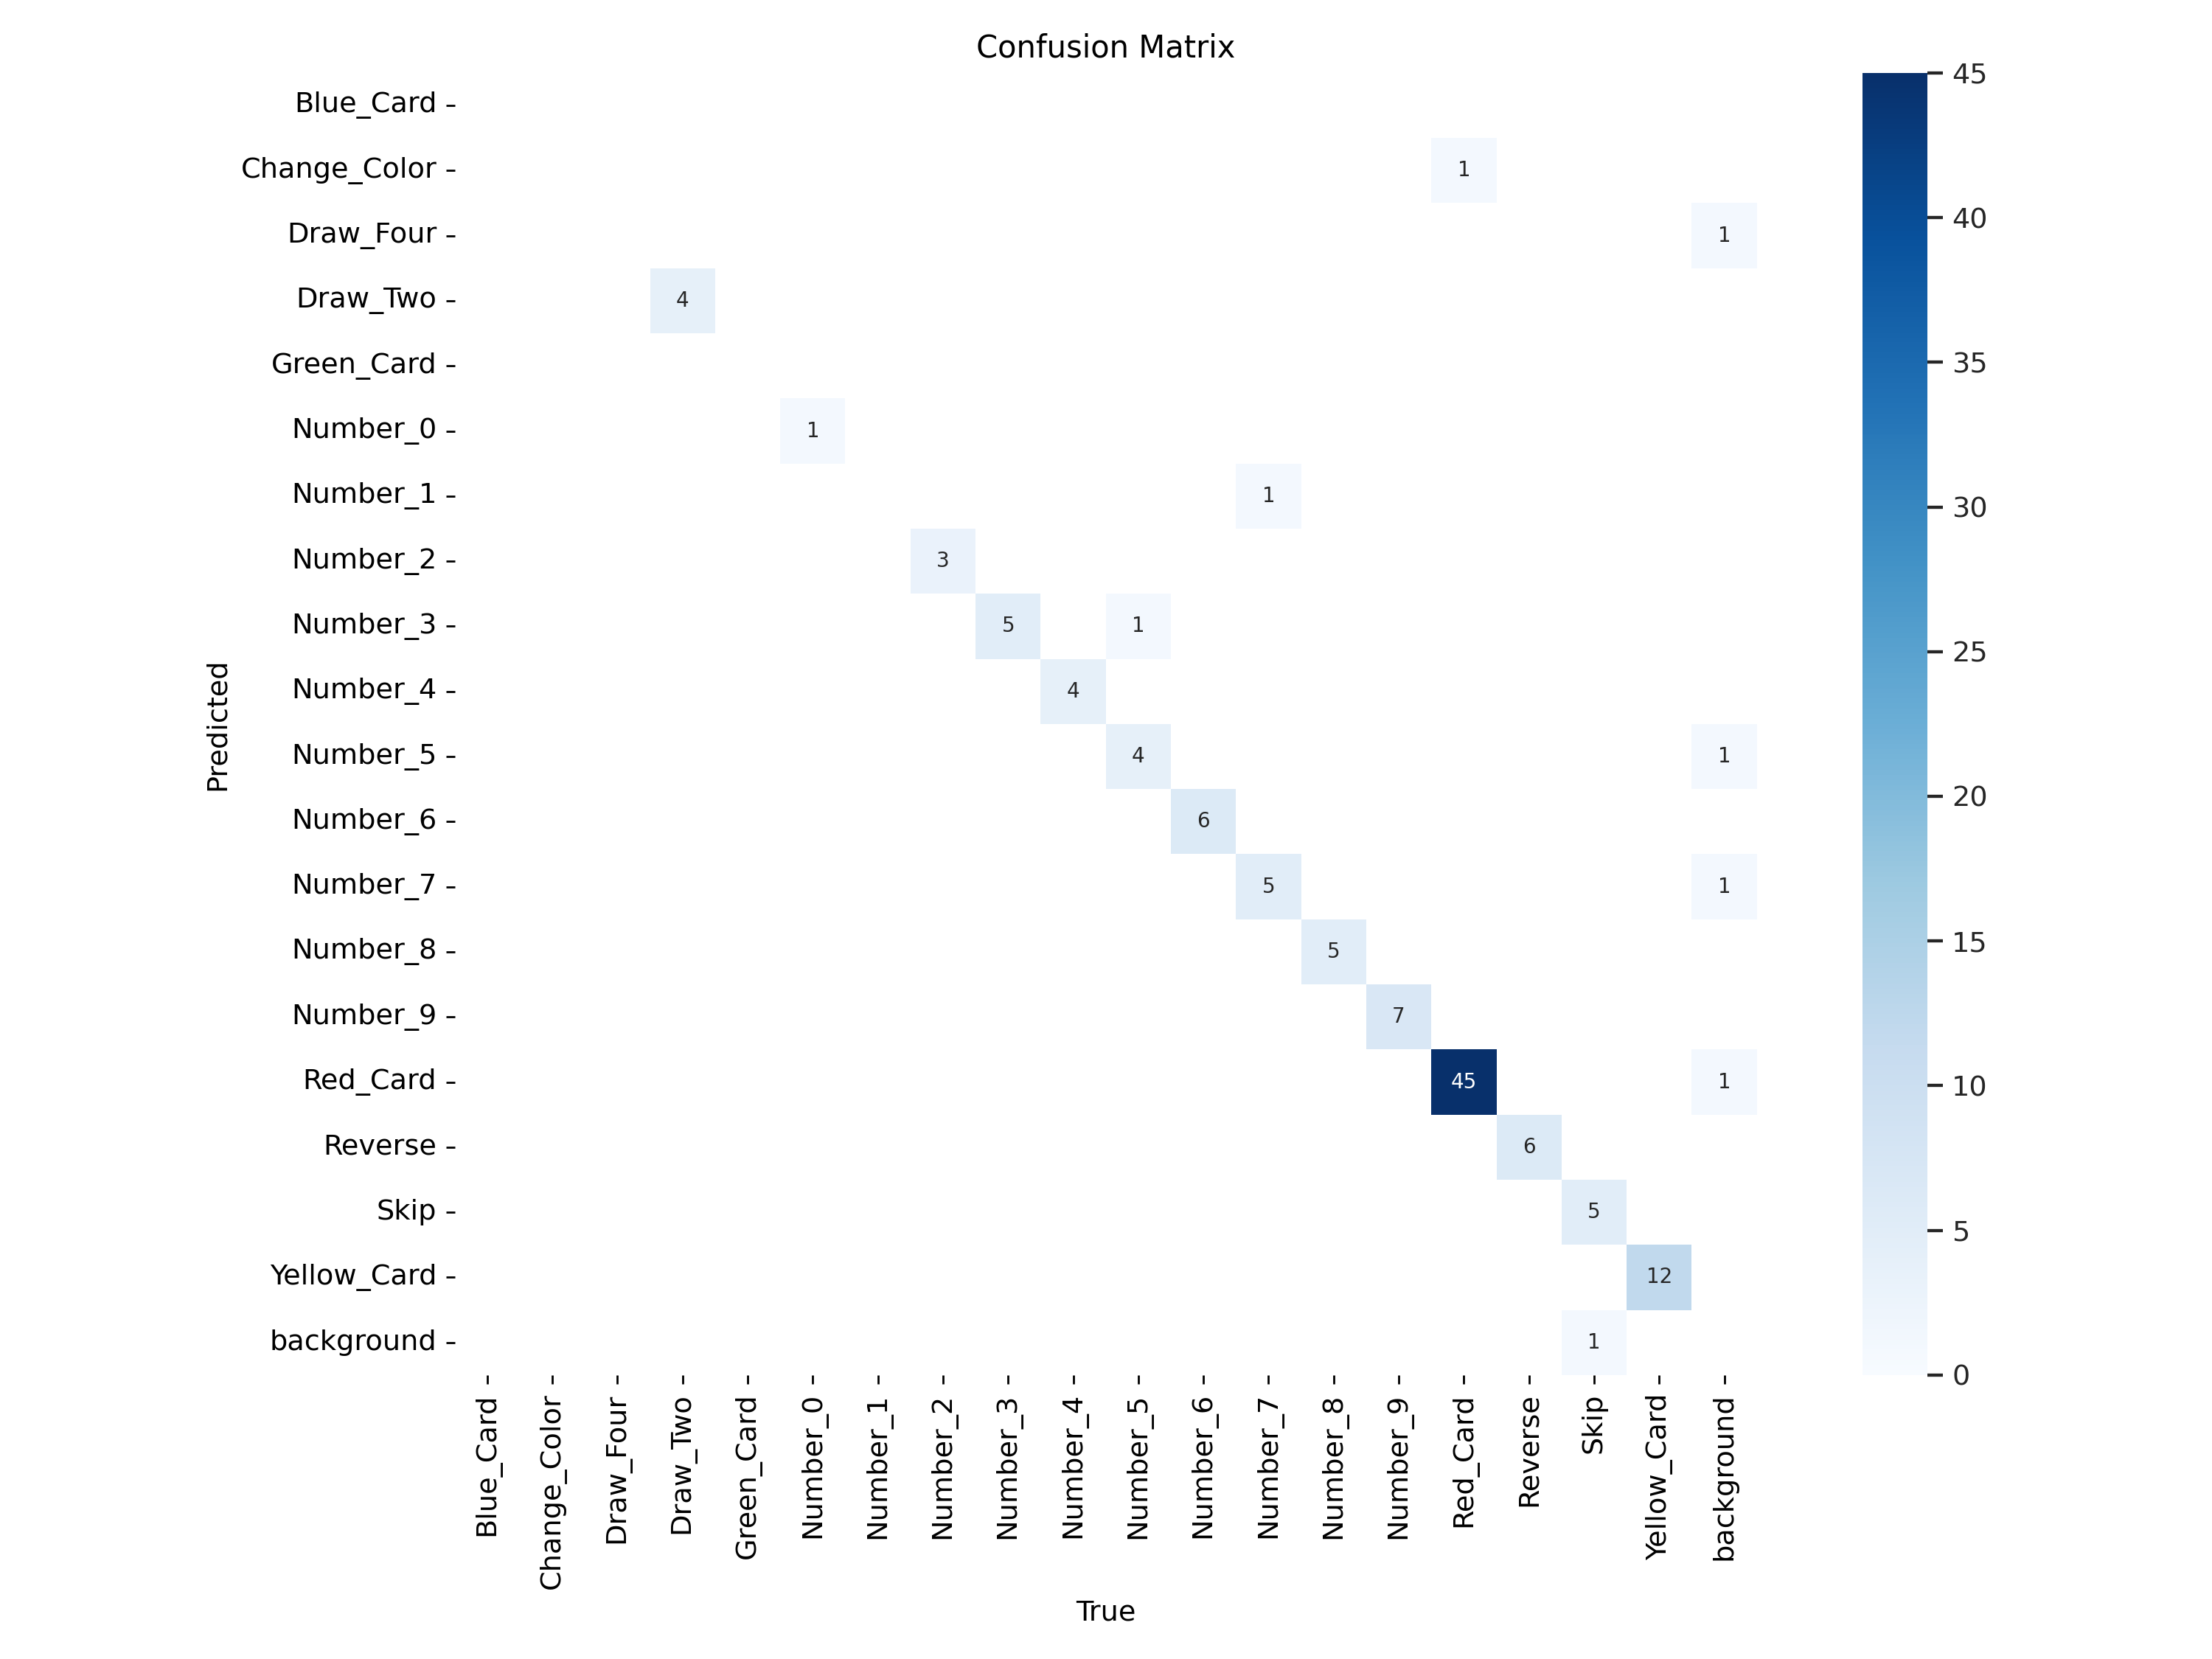

In [13]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)


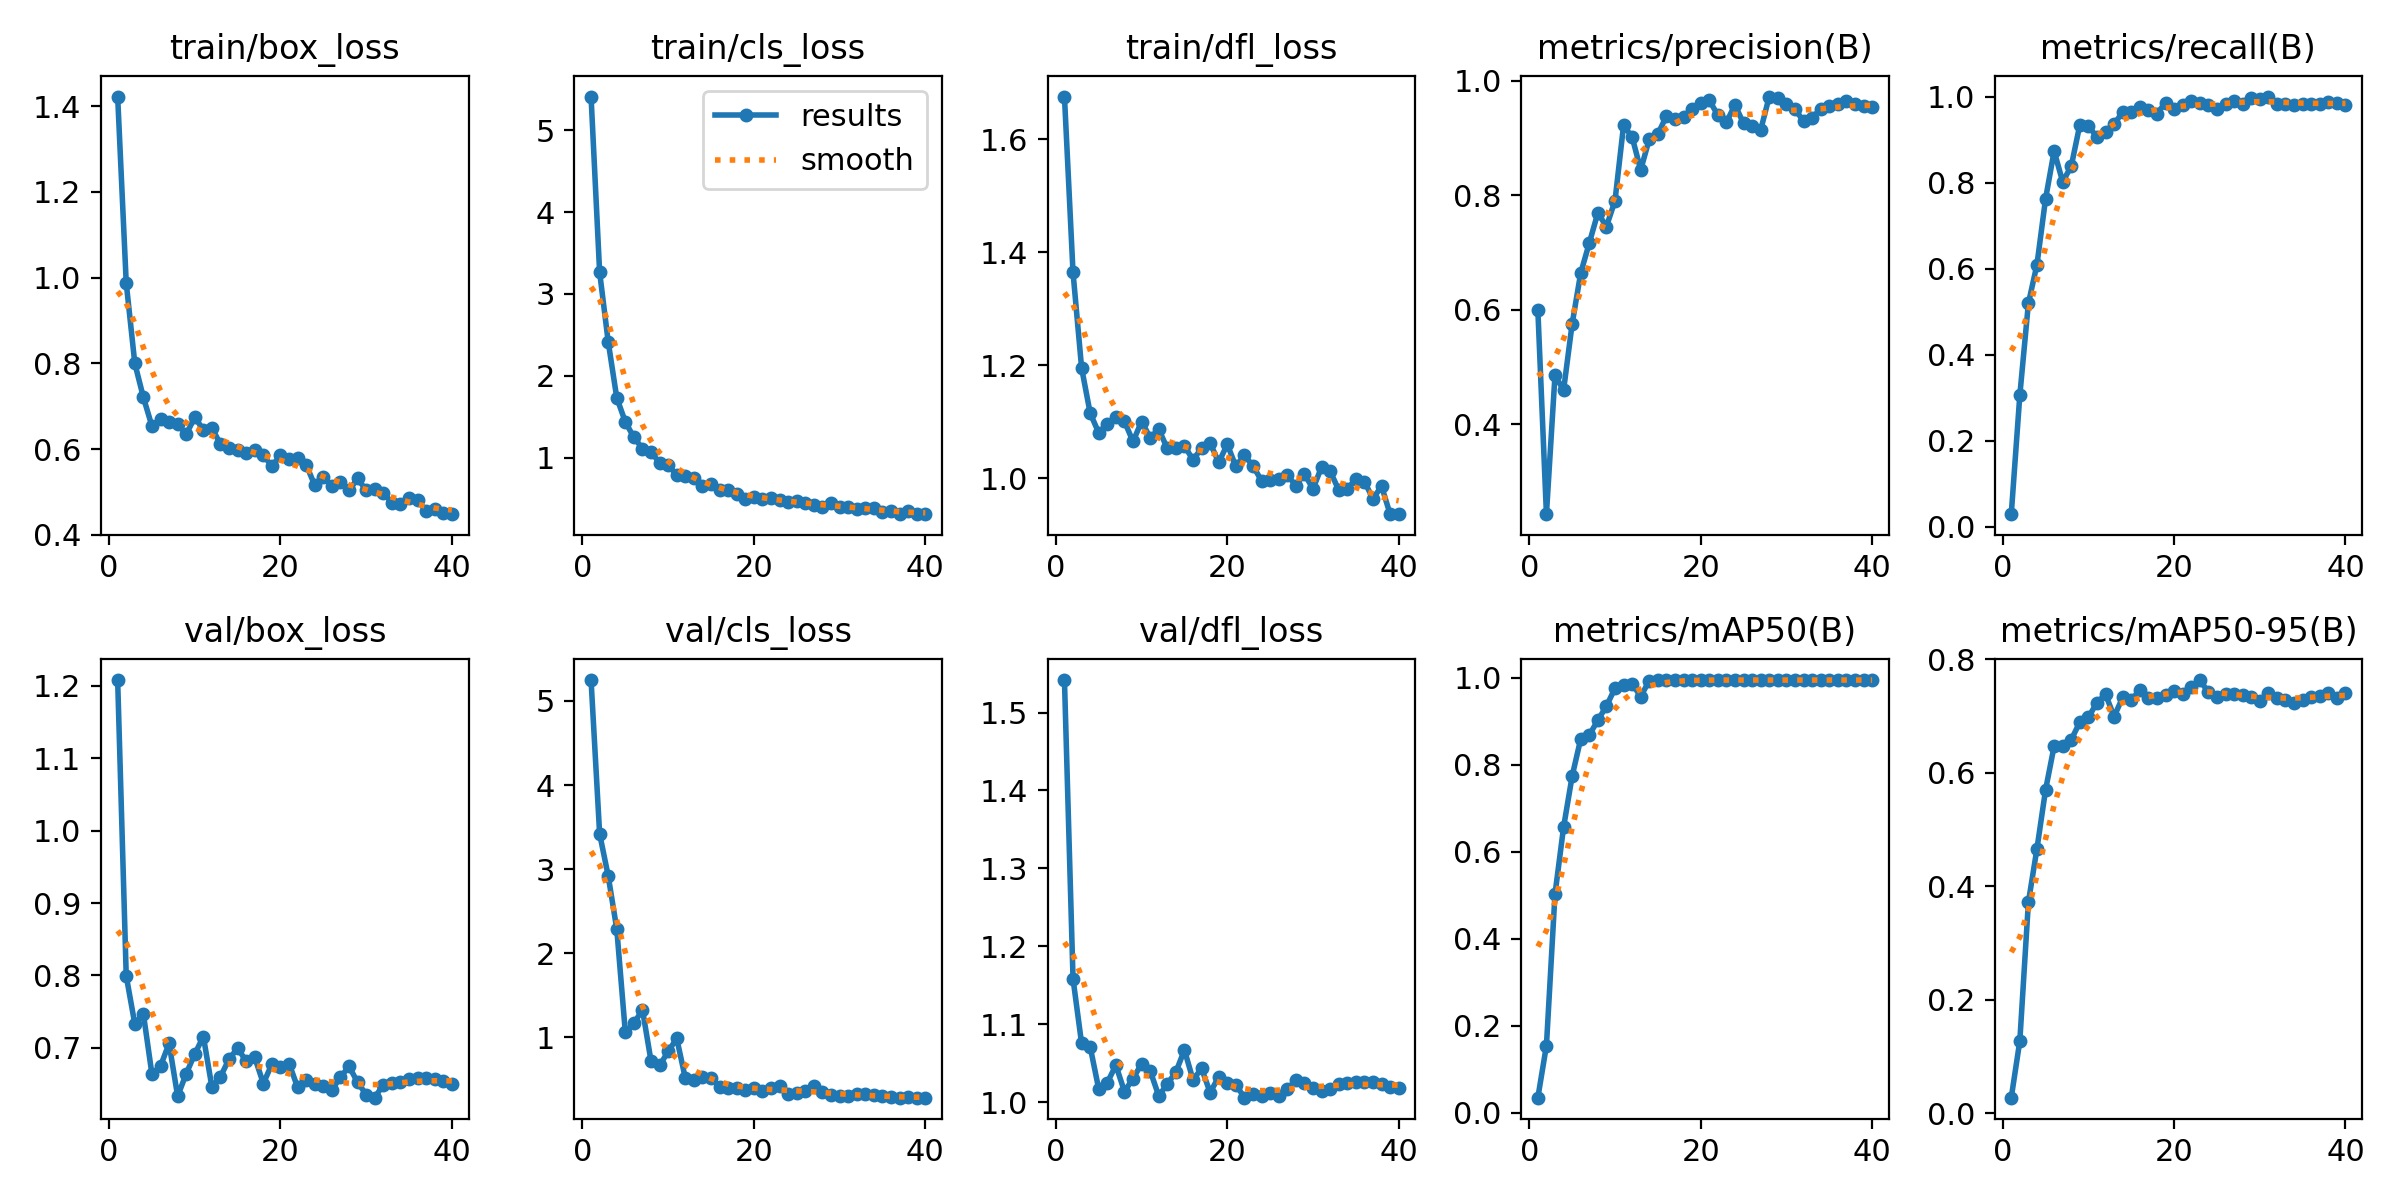

In [14]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)


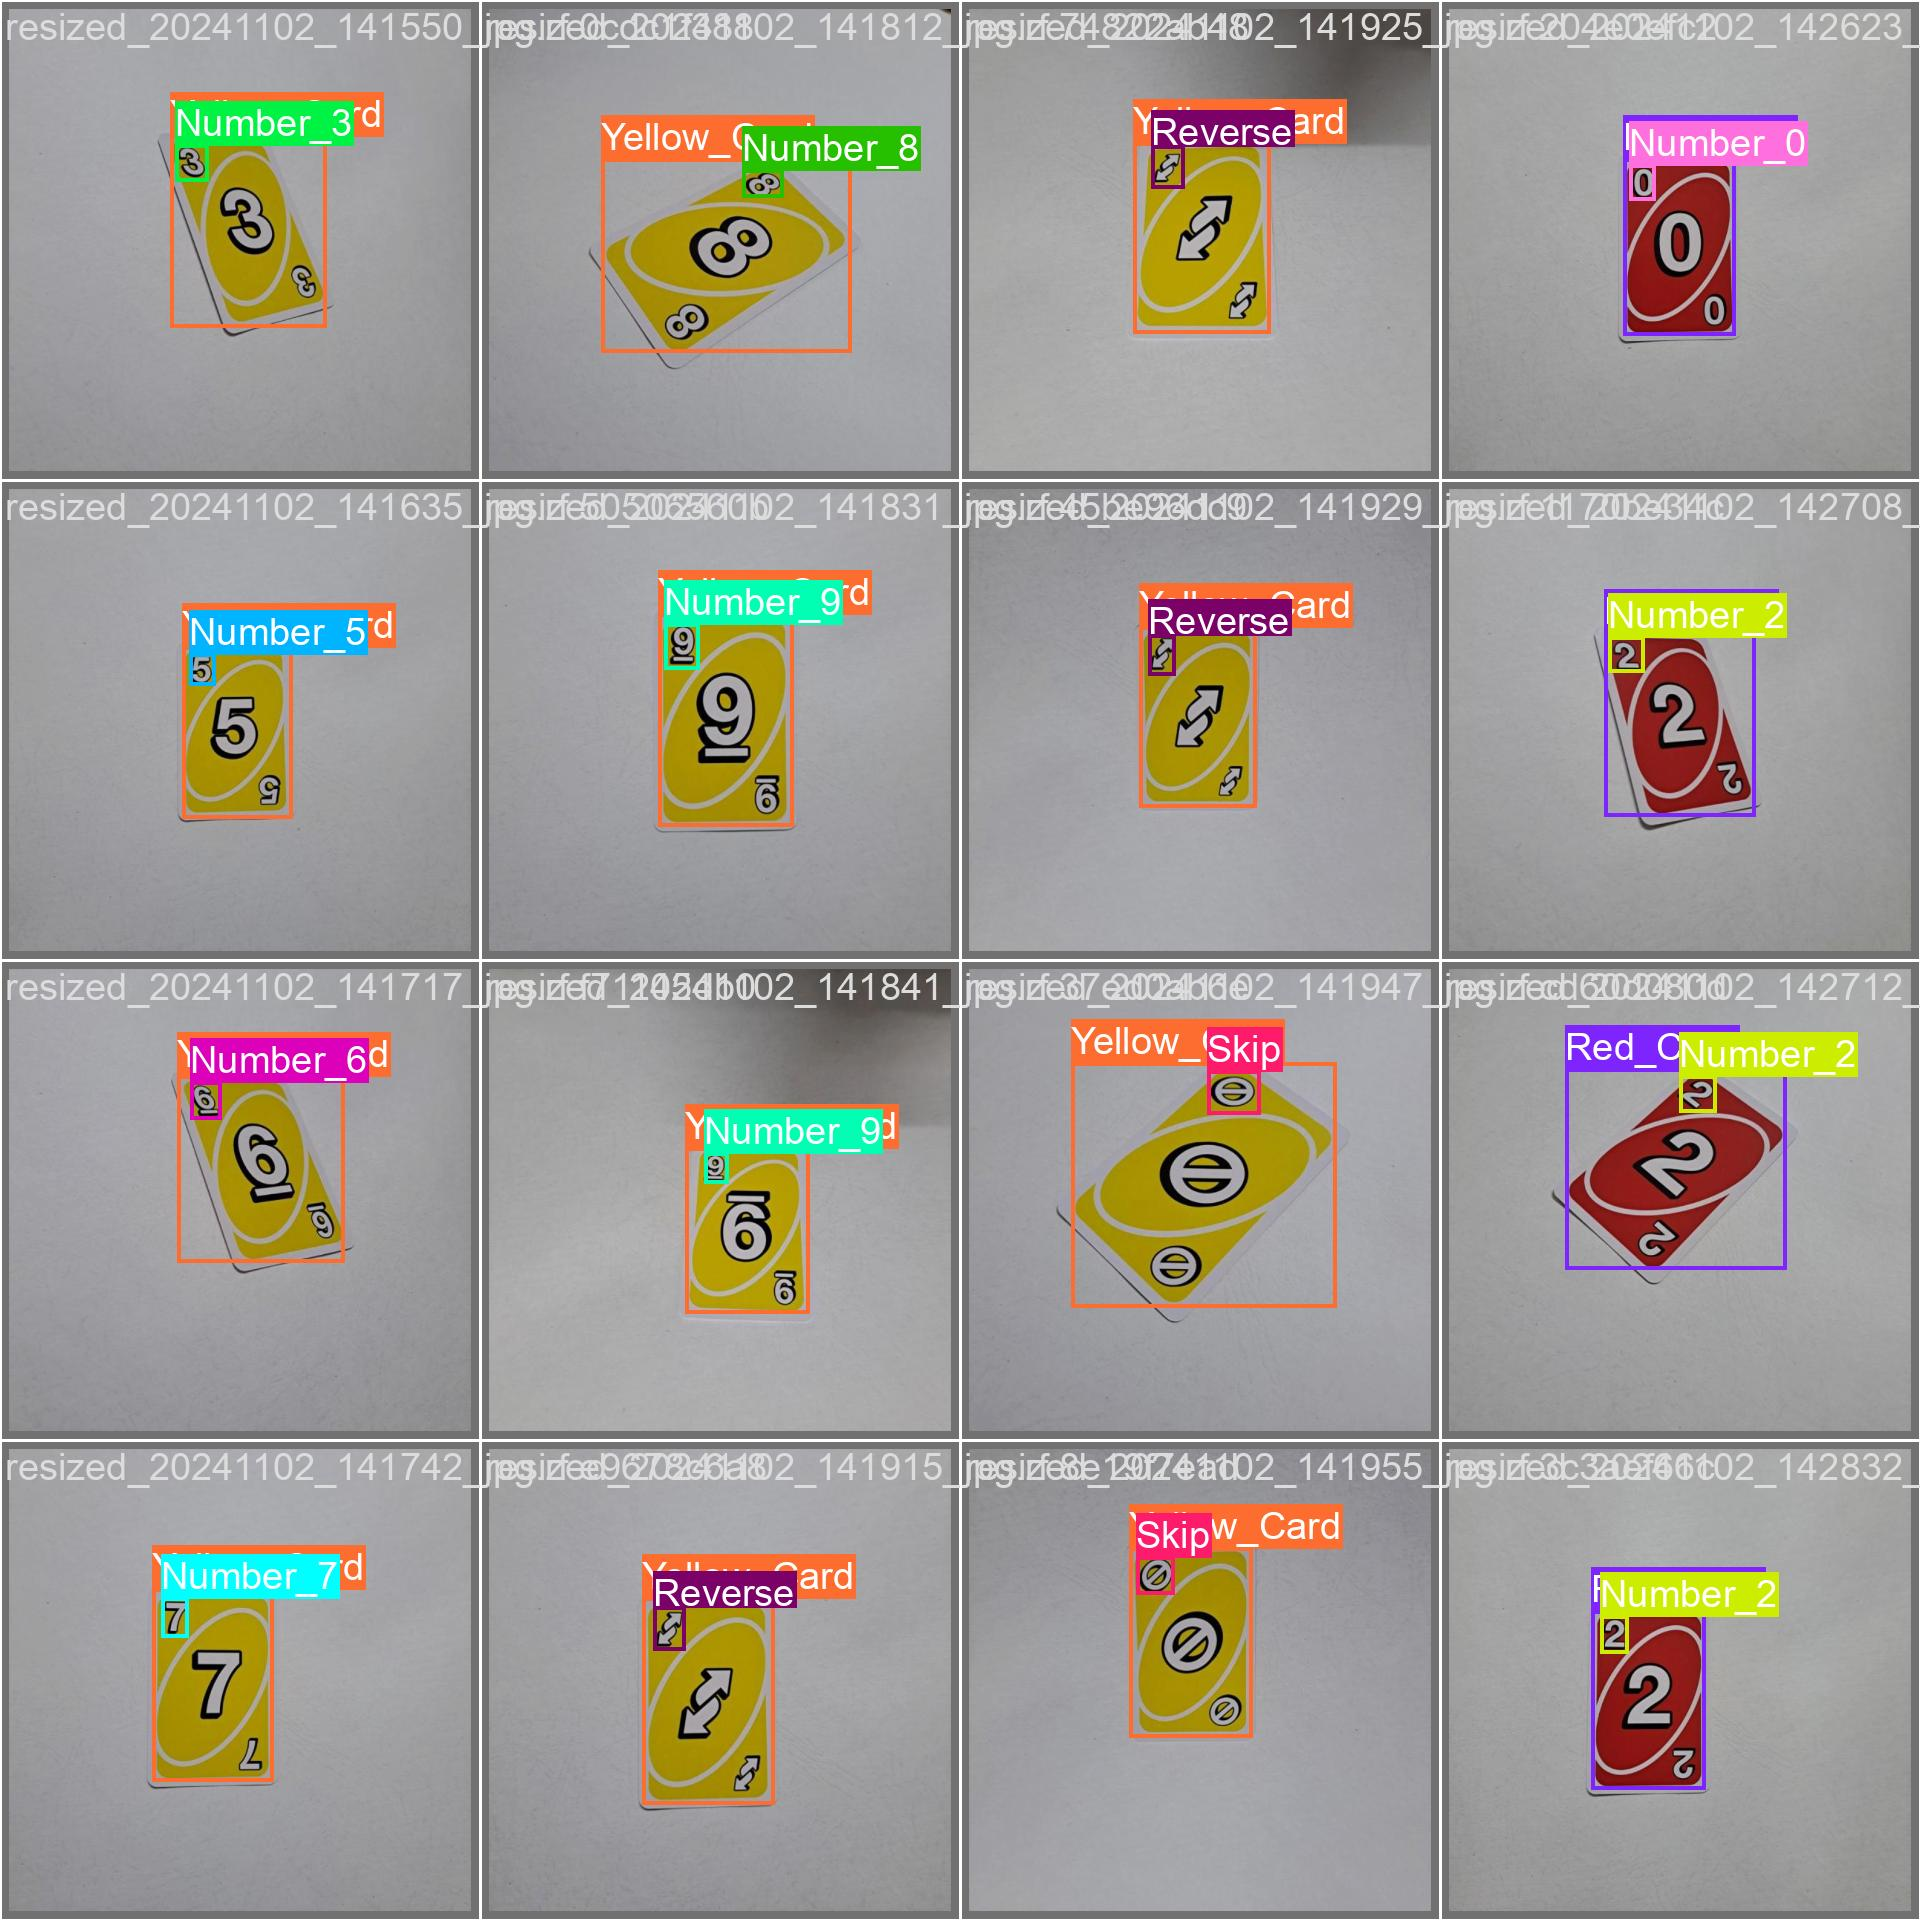

In [15]:
Image(filename=f'/content/runs/detect/train/val_batch0_labels.jpg', width=600)

In [17]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data="/content/Annotating-~300-Cards--3/data.yaml"

Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 486 layers, 7,174,441 parameters, 0 gradients, 26.8 GFLOPs
val: Scanning /content/Annotating-~300-Cards--3/valid/labels.cache... 58 images, 0 backgrounds, 0 corrupt: 100% 58/58 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:03<00:00,  1.18it/s]
                   all         58        116      0.928      0.984      0.995      0.755
              Draw_Two          4          4      0.873          1      0.995      0.702
              Number_0          1          1      0.771          1      0.995      0.796
              Number_2          3          3      0.892          1      0.995      0.768
              Number_3          5          5       0.87          1      0.995      0.796
              Number_4          4          4      0.878          1      0.995      0.648
              Number_5          5        

In [18]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source="/content/Annotating-~300-Cards--3/test/images" save=True


Ultralytics 8.3.27 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 486 layers, 7,174,441 parameters, 0 gradients, 26.8 GFLOPs

image 1/20 /content/Annotating-~300-Cards--3/test/images/resized_20241102_141523_jpg.rf.ce1f948065444b4c23aca37c028fa78a.jpg: 800x800 1 Number_2, 1 Yellow_Card, 140.5ms
image 2/20 /content/Annotating-~300-Cards--3/test/images/resized_20241102_141649_jpg.rf.b997165ef6364b074415f1ff78a4b0d1.jpg: 800x800 1 Number_5, 1 Yellow_Card, 29.1ms
image 3/20 /content/Annotating-~300-Cards--3/test/images/resized_20241102_141750_jpg.rf.2c89ff9cd8c6c449212175a8dba60635.jpg: 800x800 1 Number_7, 1 Yellow_Card, 28.7ms
image 4/20 /content/Annotating-~300-Cards--3/test/images/resized_20241102_141804_jpg.rf.6009b93dab29bc80a1b8075dec8a249f.jpg: 800x800 1 Number_8, 1 Yellow_Card, 28.7ms
image 5/20 /content/Annotating-~300-Cards--3/test/images/resized_20241102_141815_jpg.rf.dd74f055a29e6d1bb1fe77206e8191d9.jpg: 800x800 1 Number_8, 1 Yellow_Card,

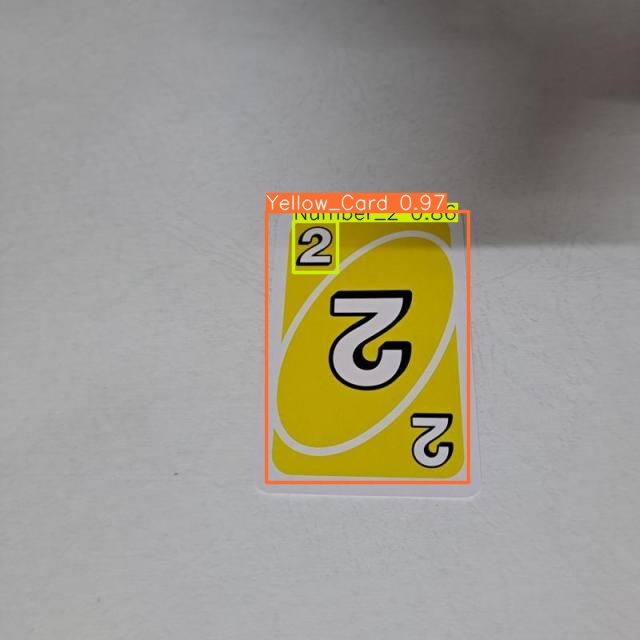

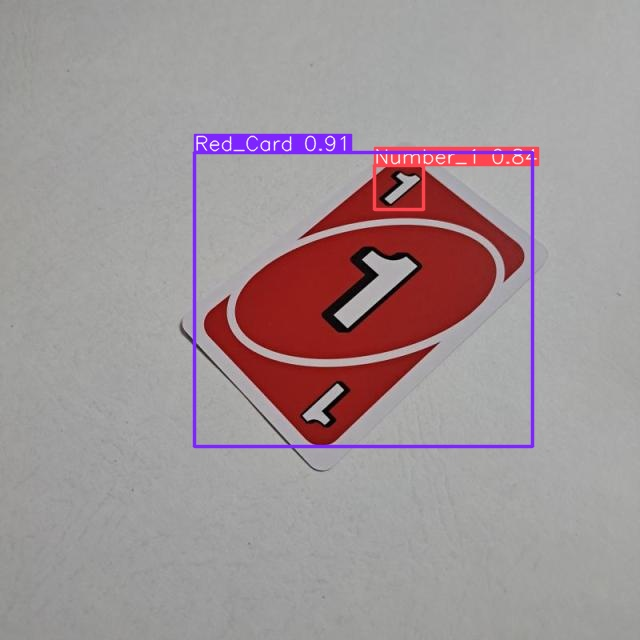

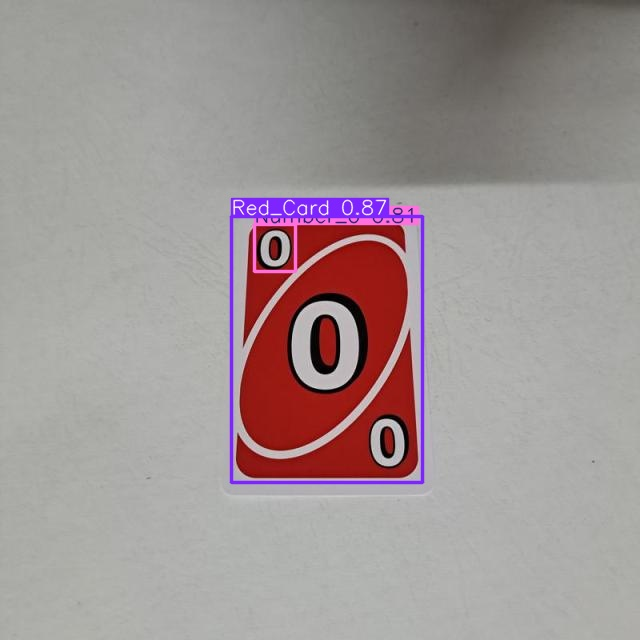

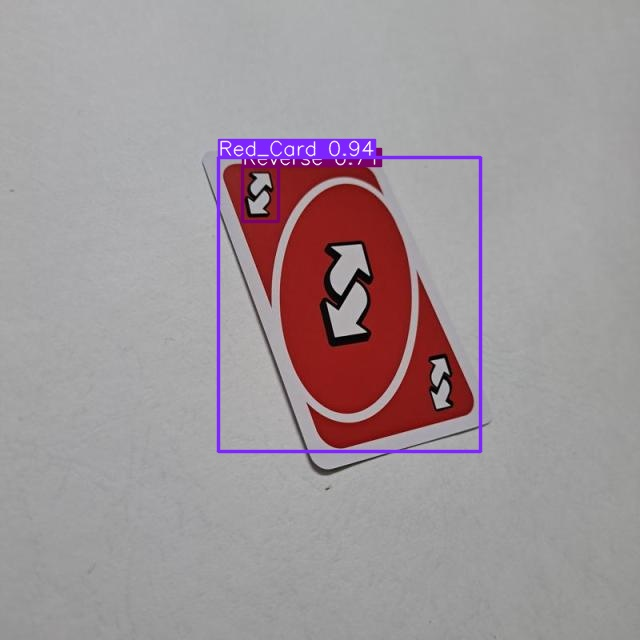

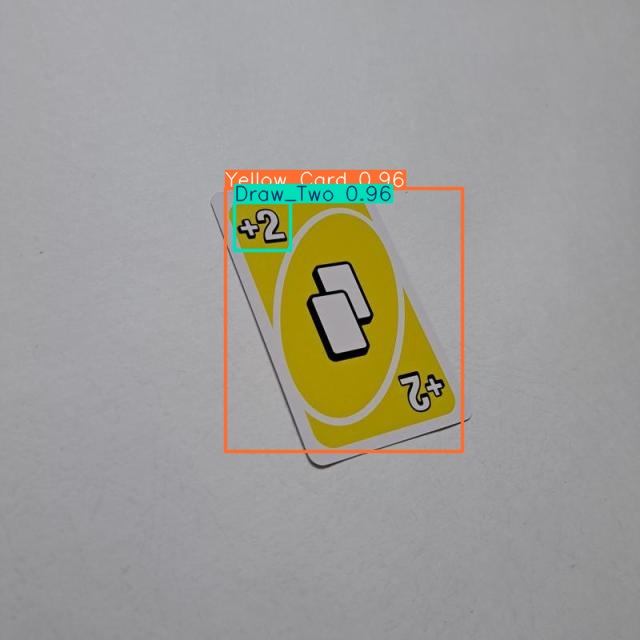

In [19]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:5]:
      display(Image(filename=image_path, width=400))
      print("\n")


# interface.start

In [26]:
!pip install streamlit pyngrok

In [24]:
from copy import deepcopy
import streamlit as st
from PIL import Image
import numpy as np
import cv2
from ultralytics import YOLO

# Load the YOLO model
model = ("/content/runs/detect/train/weights/best.pt")
# model = YOLO(r"best.pt")

colors = {'0': 'red', '1': 'yellow', '2': 'green', '3': 'blue', '4': 'No Color'}
value = {'0': '0','1': '1','2': '2','3': '3','4': '4','5': '5','6': '6','7': '7','8': '8','9': '9','A': 'Reverse','B': 'Skip','C': 'Draw Two',}


def process_image(image):
    # Convert the image to a NumPy array for OpenCV processing
    image_np = np.array(image)

    # Convert RGB to BGR for OpenCV if necessary
    image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    # Ensure the image is not empty
    if image_np.size == 0:
        raise ValueError("Input image is empty.")

    # Resize the image as necessary for your model
    desired_size = (640, 640)  # Adjust based on your model's requirements
    image_resized = cv2.resize(image_np, desired_size, interpolation=cv2.INTER_LINEAR)

    # Get predictions from your model (assuming the model expects RGB images)
    results = model.predict(image_resized)  # Model output assumed to be in the resized size
    labels = []
    colors1 = []

    # Loop through results and annotate the resized image
    for result in results:
        boxes = result.boxes.xyxy.numpy()  # Get bounding box coordinates
        confidences = result.boxes.conf.numpy()  # Get confidence scores
        class_ids = result.boxes.cls.numpy()  # Get class IDs

        for box, conf, class_id in zip(boxes, confidences, class_ids):
            x1, y1, x2, y2 = box
            label = f"{model.names[int(class_id)]}: {conf:.2f}"
            print('Label is: ', label)
            required_color = colors[label[0]]
            if '40' in label:
                label = 'Color: {} <==> Value: +4 Card'.format('No Color')
            elif '41' in label:
                label = 'Color: {} <==> Value: Wild Card'.format('No Color')
            else:
                label = 'Color: {} <==> Value: {}'.format(required_color, value[label[1]])
            labels.append(label)
            # Set the color of the box and text as needed
            cv2.rectangle(image_resized, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
            cv2.putText(image_resized, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Convert the annotated image back to RGB format for PIL
    annotated_image = Image.fromarray(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))

    return annotated_image, labels, colors1


def live_stream_prediction():
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open camera.")
        exit()

    while True:
        # Read a frame from the camera
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        # Run inference on the current frame
        results = model(frame)

        # Loop through results and annotate the frame
        for result in results:
            boxes = result.boxes.xyxy.numpy()  # Get bounding box coordinates
            confidences = result.boxes.conf.numpy()  # Get confidence scores
            class_ids = result.boxes.cls.numpy()  # Get class IDs

            # Draw boxes and labels on the frame
            for box, conf, class_id in zip(boxes, confidences, class_ids):
                x1, y1, x2, y2 = box
                # color = get_dominant_color(frame)
                label = f"{model.names[int(class_id)]}: {conf:.2f}"
                required_color = colors[label[0]]
                if '40' in label:
                    label = 'Color: {} <==> Value: +4 Card'.format('No Color')
                elif '41' in label:
                    label = 'Color: {} <==> Value: Wild Card'.format('No Color')
                else:
                    label = 'Color: {} <==> Value: {}'.format(required_color, value[label[1]])


                # label = f"{model.names[int(class_id)]}: {conf:.2f} :: Color: " + color
                cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
                cv2.putText(frame, label, (int(x1), int(y1) - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        # Display the frame with detections
        cv2.imshow("YOLO Inference", frame)

        # Exit if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the camera and close all OpenCV windows
    cap.release()
    cv2.destroyAllWindows()


# Title of the app
st.title("Image Upload and Processing")

# Upload button
uploaded_file = st.file_uploader("Upload an Image", type=["png", "jpg", "jpeg"])

if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file)
    print("Path is: ", uploaded_file)

    # Button to process the image
    if st.button("Process Image"):
        with st.spinner("Processing..."):
            # Process the image
            processed_image, labels, colors = process_image(image)

            # Create two columns for side-by-side display
            col1, col2 = st.columns(2)
            with col1:
                st.image(image, caption='Uploaded Image', use_column_width=True)
            with col2:
                st.image(processed_image, caption='Annotated Image', use_column_width=True)

            # Display the list of detected labels
            st.subheader("Detected Objects:")
            for ind, label in enumerate(labels):
                st.write('1. ' + label)

# Button for live stream prediction
if st.button("Start Live Stream Prediction"):
    st.warning("Press 'q' to stop the live stream in the terminal.")
    live_stream_prediction()

# Footer
st.markdown("---")
st.markdown("### About this App")
st.markdown("This app allows you to upload an image and processes it by identifying objects using YOLO.")
st.markdown("Made with ❤️ by Streamlit.")

2024-11-02 21:23:52.514 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 21:23:52.553 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-02 21:23:52.554 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 21:23:52.557 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 21:23:52.558 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 21:23:52.560 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 21:23:52.561 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-02 21:23:52.562 Thread 'MainThread': mi

DeltaGenerator()

In [28]:
from pyngrok import ngrok

# Run Streamlit app
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py --server.port 8501





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.147.177:8501

  Stopping...
^C
